<a href="https://colab.research.google.com/github/Vishal-Dhoriya/woc5.0-ml-weather-prediction-case-study-Vishal/blob/main/WOC5.0-ML-Mid_evaluation_Part-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather (2).csv


In [ ]:
wp = pd.read_csv('/content/weather.csv')

In [ ]:
wp

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [ ]:
wp['weather'].describe()

count     1461
unique       5
top       rain
freq       641
Name: weather, dtype: object

In [ ]:
wp.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
wp = wp[wp['weather']!= 'drizzle']

In [ ]:
wp = wp[wp['weather']!= 'snow']

In [ ]:
wp = wp[wp['weather']!= 'fog']

In [ ]:
wp

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1459,0.0,5.6,-1.0,3.4,sun


In [ ]:
wp['weather'] =wp['weather'].map({'rain':0,'sun':1})

In [ ]:
wp

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,0
2,0.8,11.7,7.2,2.3,0
3,20.3,12.2,5.6,4.7,0
4,1.3,8.9,2.8,6.1,0
5,2.5,4.4,2.2,2.2,0
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,1
1456,8.6,4.4,1.7,2.9,0
1457,1.5,5.0,1.7,1.3,0
1459,0.0,5.6,-1.0,3.4,1


In [ ]:
#spliting dataset into dependent and independent features

In [ ]:
X = wp.iloc[:,:-1]

In [ ]:
y  = wp.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
para = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor = GridSearchCV(lr,param_grid = para,scoring = 'accuracy',cv=5)

In [ ]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 4, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.965625


In [ ]:
#prediction
y_pred = classifier_regressor.predict(X_test)

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9626168224299065


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       163
           1       1.00      0.92      0.96       158

    accuracy                           0.96       321
   macro avg       0.97      0.96      0.96       321
weighted avg       0.97      0.96      0.96       321



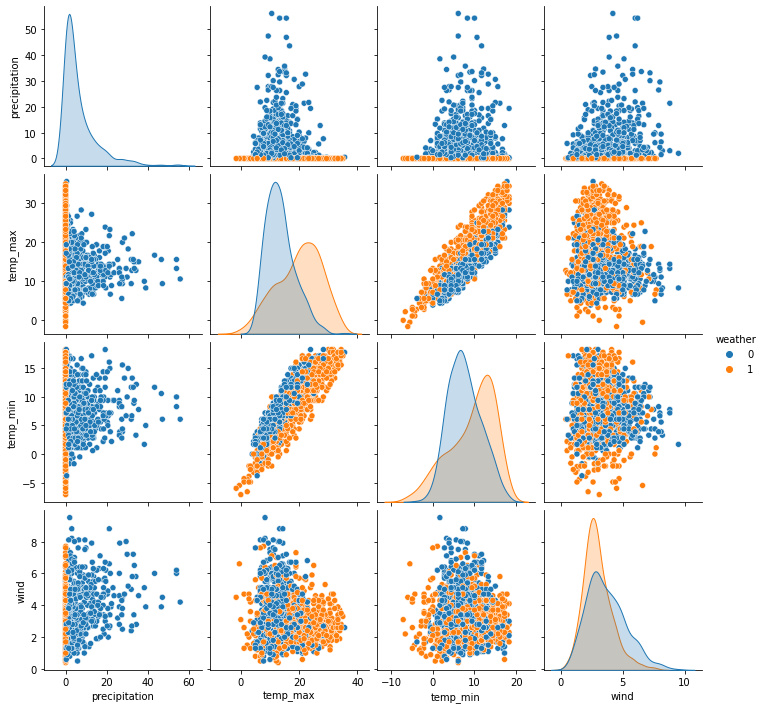

In [ ]:
sns.pairplot(wp,hue='weather')

In [ ]:
wp.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.233334,-0.066462,0.312007,-0.472722
temp_max,-0.233334,1.000000,0.864699,-0.186461,0.443492
temp_min,-0.066462,0.864699,1.000000,-0.085976,0.180219
wind,0.312007,-0.186461,-0.085976,1.000000,-0.248546
weather,-0.472722,0.443492,0.180219,-0.248546,1.000000
